In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pykalman import KalmanFilter
from openbb_terminal.sdk import openbb

In [2]:
# Get stock price data using the OpenB SDK
name = (input("Enter ticker of your choice")).upper()
data = openbb.stocks.load(name, start_date="2010-01-01", end_date="2023-01-01")
prices = data["Adj Close"]

Enter ticker of your choice ^GSPC


Loading Daily data for ^GSPC with starting period 2010-01-04.

In [3]:
kf = KalmanFilter(
    transition_matrices = [1],
    observation_matrices = [1],
    initial_state_mean = 0,
    initial_state_covariance = 1,
    observation_covariance=1,
    transition_covariance=0.01
)

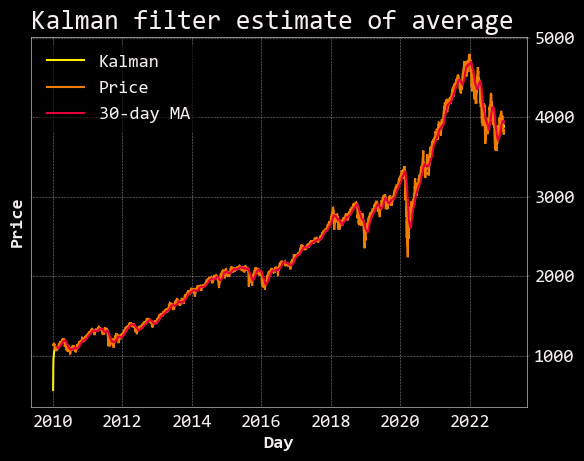

In [4]:
state_means, _ = kf.filter(prices.values)
state_means = pd.Series(state_means.flatten(), index=prices.index)

mean30 = prices.rolling(window=30).mean()

plt.plot(state_means)
plt.plot(prices)
plt.plot(mean30)
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman', 'Price', '30-day MA'])
plt.xlabel('Day')
plt.ylabel('Price')

# Save the figure.
plt.savefig(f"./Images/{name}KalmanFilterEstimateAverage.jpg")

plt.show()

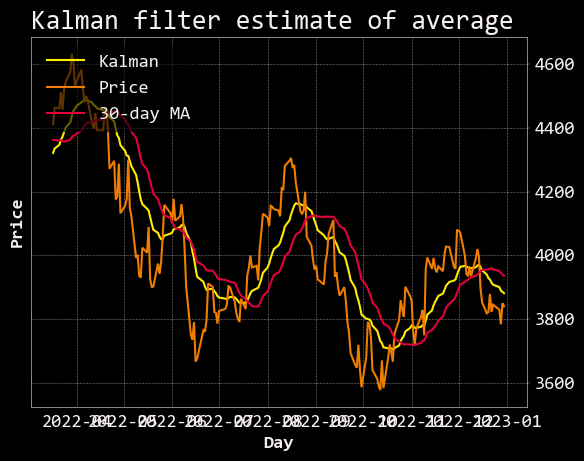

In [5]:
plt.plot(state_means[-200:])
plt.plot(prices[-200:])
plt.plot(mean30[-200:])
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman', 'Price', '30-day MA'])
plt.xlabel('Day')
plt.ylabel('Price');

# Save the figure.
plt.savefig(f"./Images/{name}RecentKalmanFilterEstimateAverage.jpg")

plt.show()